In [3]:
#A1
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

# Load dataset
df = pd.read_csv("RFMiD_Training_Labels.csv")

# Take first two numerical columns as features and 'Disease_Risk' (example) as target (modify as per your file)
X = df.iloc[:, 1:3]   # First 2 feature columns
y = df.iloc[:, -1]    # Target (last column)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a classifier (Random Forest here)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Confusion matrices
print("Training Confusion Matrix:\n", confusion_matrix(y_train, y_train_pred))
print("\nTest Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))

# Precision, Recall, F1-score
print("\nTraining Classification Report:\n", classification_report(y_train, y_train_pred))
print("\nTest Classification Report:\n", classification_report(y_test, y_test_pred))

# Observation: Compare train vs test scores to infer underfit/regularfit/overfit


Training Confusion Matrix:
 [[1343    0]
 [   1    0]]

Test Confusion Matrix:
 [[576]]

Training Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1343
           1       0.00      0.00      0.00         1

    accuracy                           1.00      1344
   macro avg       0.50      0.50      0.50      1344
weighted avg       1.00      1.00      1.00      1344


Test Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       576

    accuracy                           1.00       576
   macro avg       1.00      1.00      1.00       576
weighted avg       1.00      1.00      1.00       576



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:386: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: Undefin

In [2]:
#A2
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
import numpy as np

# Load Excel file
file_path = 'Lab Session Data.xlsx'
df = pd.read_excel(file_path)
df.columns = df.columns.str.strip()

# Select actual and predicted columns — change 'Milk' if needed
data = df[['Payment (Rs)', 'Milk']].dropna()
actual = data['Payment (Rs)']
predicted = data['Milk']

# Evaluate regression metrics
mse = mean_squared_error(actual, predicted)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(actual, predicted) * 100

# Safely calculate R² only if >= 2 samples
if len(data) >= 2:
    r2 = r2_score(actual, predicted)
else:
    r2 = None

# Print results
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
if r2 is not None:
    print(f"R-squared (R²) Score: {r2:.4f}")
else:
    print("R-squared (R²) Score: Not enough data to compute R² (needs at least 2 samples)")

Mean Squared Error (MSE): 135424.00
Root Mean Squared Error (RMSE): 368.00
Mean Absolute Percentage Error (MAPE): 95.34%
R-squared (R²) Score: Not enough data to compute R² (needs at least 2 samples)


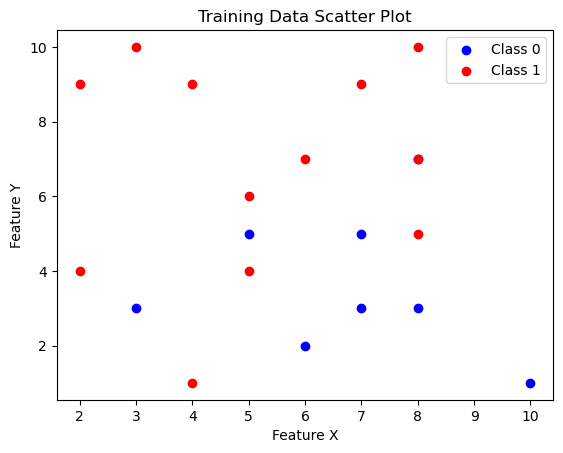

In [5]:
#A3
import numpy as np
import matplotlib.pyplot as plt

# Generate random X & Y between 1 and 10
np.random.seed(42)
X_train = np.random.randint(1, 11, 20)
Y_train = np.random.randint(1, 11, 20)

# Randomly assign classes 0 or 1
classes = np.random.choice([0, 1], size=20)

# Scatter plot
plt.scatter(X_train[classes==0], Y_train[classes==0], color='blue', label='Class 0')
plt.scatter(X_train[classes==1], Y_train[classes==1], color='red', label='Class 1')
plt.xlabel('Feature X')
plt.ylabel('Feature Y')
plt.title('Training Data Scatter Plot')
plt.legend()
plt.show()


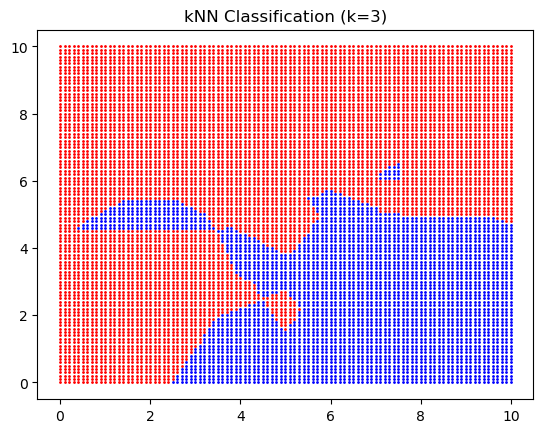

In [7]:
#A4
from sklearn.neighbors import KNeighborsClassifier

# Combine X & Y into feature array
train_data = np.column_stack((X_train, Y_train))

# Generate test data (X, Y from 0 to 10 with 0.1 step)
x_test, y_test = np.meshgrid(np.arange(0, 10.1, 0.1), np.arange(0, 10.1, 0.1))
test_points = np.c_[x_test.ravel(), y_test.ravel()]

# kNN classifier (k=3)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(train_data, classes)

# Predict classes for test points
test_pred = knn.predict(test_points)

# Scatter plot of classified test points
plt.scatter(test_points[test_pred==0][:,0], test_points[test_pred==0][:,1], color='blue', s=1)
plt.scatter(test_points[test_pred==1][:,0], test_points[test_pred==1][:,1], color='red', s=1)
plt.title('kNN Classification (k=3)')
plt.show()


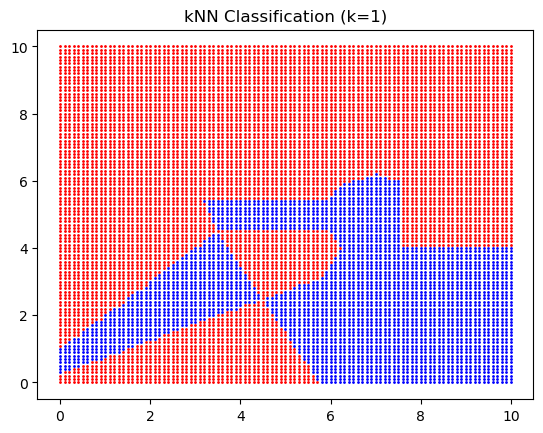

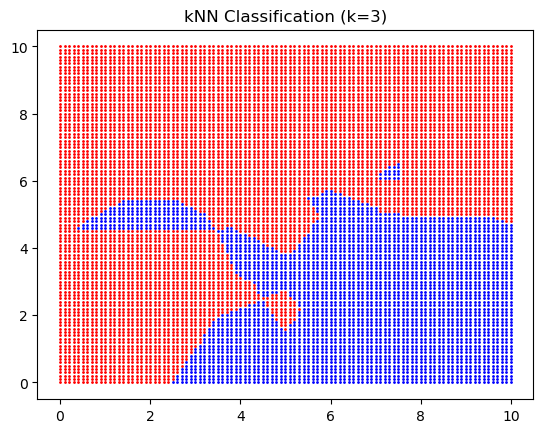

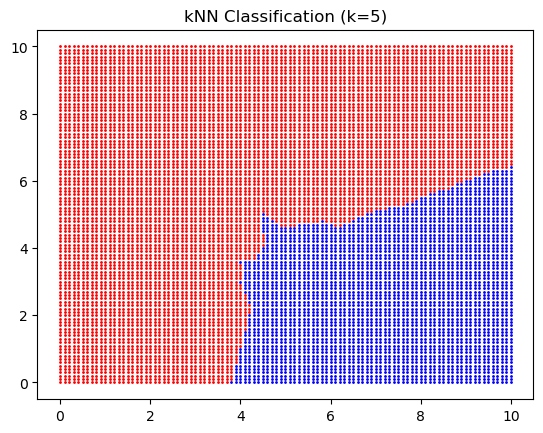

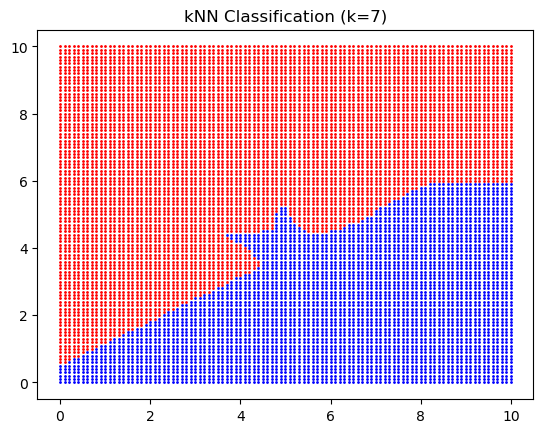

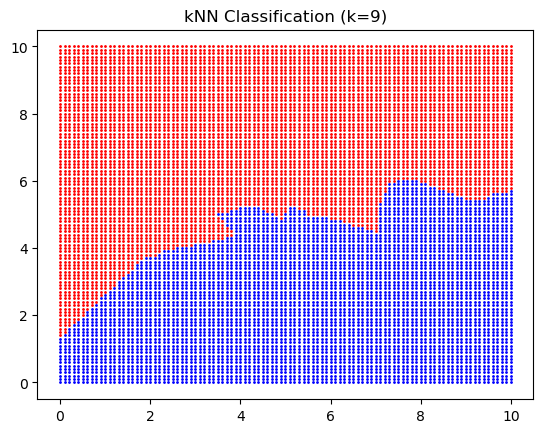

In [9]:
#A5
for k in [1, 3, 5, 7, 9]:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(train_data, classes)
    test_pred = knn.predict(test_points)
    
    plt.scatter(test_points[test_pred==0][:,0], test_points[test_pred==0][:,1], color='blue', s=1)
    plt.scatter(test_points[test_pred==1][:,0], test_points[test_pred==1][:,1], color='red', s=1)
    plt.title(f'kNN Classification (k={k})')
    plt.show()


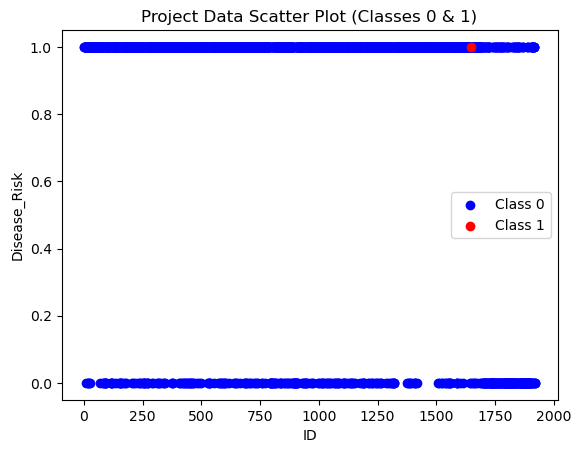

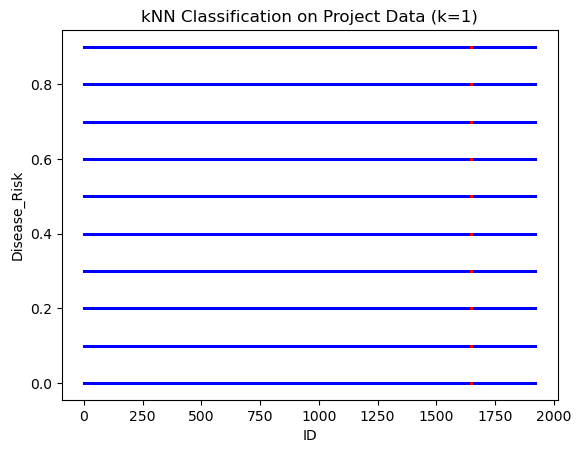

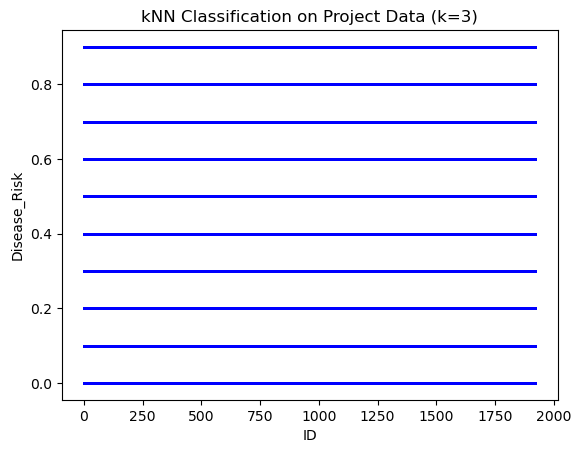

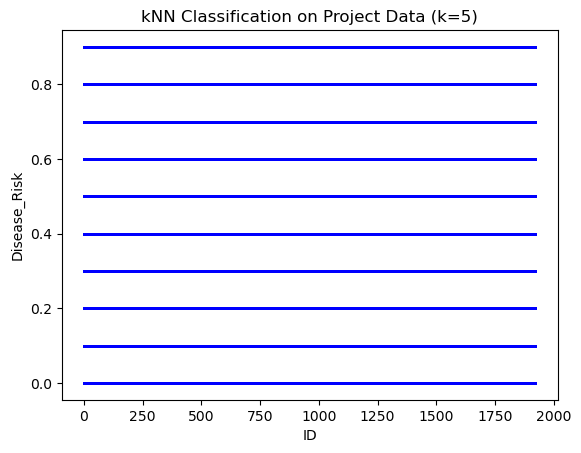

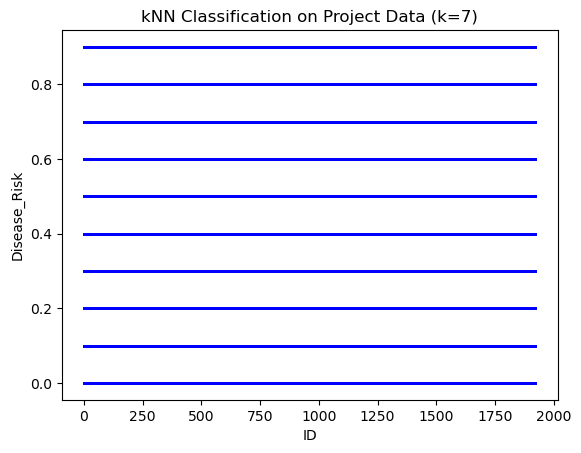

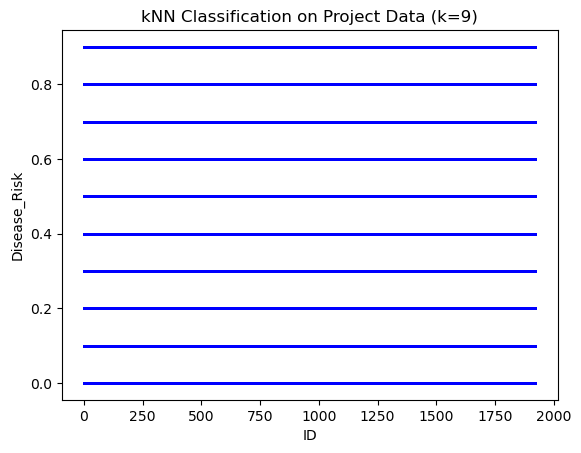

In [11]:
#A6
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder

# Load dataset
df = pd.read_csv("RFMiD_Training_Labels.csv")

# Automatically select two numeric features and the target column
features = df.select_dtypes(include=[np.number]).columns[:2]
target_col = df.select_dtypes(include=[np.number]).columns[-1]  # Last numeric column as target

X_proj = df[features].values
y_proj = df[target_col].values

# If target is not binary, convert it to binary (class 0 & 1 for simplicity)
if len(np.unique(y_proj)) > 2:
    y_proj = np.where(y_proj > y_proj.median(), 1, 0)  # Split based on median

# Scatter plot of project data
plt.scatter(X_proj[y_proj==0, 0], X_proj[y_proj==0, 1], color='blue', label='Class 0')
plt.scatter(X_proj[y_proj==1, 0], X_proj[y_proj==1, 1], color='red', label='Class 1')
plt.xlabel(features[0])
plt.ylabel(features[1])
plt.title('Project Data Scatter Plot (Classes 0 & 1)')
plt.legend()
plt.show()

# Create test grid points for classification
x_test, y_test = np.meshgrid(np.arange(X_proj[:,0].min(), X_proj[:,0].max(), 0.1),
                             np.arange(X_proj[:,1].min(), X_proj[:,1].max(), 0.1))
test_points = np.c_[x_test.ravel(), y_test.ravel()]

# Perform kNN classification for various k values
for k in [1, 3, 5, 7, 9]:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_proj, y_proj)
    test_pred = knn.predict(test_points)

    plt.scatter(test_points[test_pred==0][:,0], test_points[test_pred==0][:,1], color='blue', s=1)
    plt.scatter(test_points[test_pred==1][:,0], test_points[test_pred==1][:,1], color='red', s=1)
    plt.title(f'kNN Classification on Project Data (k={k})')
    plt.xlabel(features[0])
    plt.ylabel(features[1])
    plt.show()



In [13]:
#A7
from sklearn.model_selection import GridSearchCV

# Hyperparameter tuning for kNN
param_grid = {'n_neighbors': range(1, 21)}  # Test k from 1 to 20
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid, cv=5)
grid.fit(X_proj, y_proj)

print("Best k value found:", grid.best_params_['n_neighbors'])
print("Best cross-validation accuracy:", grid.best_score_)


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Best k value found: 1
Best cross-validation accuracy: 0.9994791666666666
